In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [43]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [44]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [45]:
print(orig)
print(wo_drop)
print(ours)

[13.752, 13.908, 13.672, 13.764, 13.878, 13.682, 13.99, 13.802, 13.69, 13.888, 13.928]
[6.194, 7.854, 9.128, 10.246, 11.394, 12.494, 13.142, 13.556, 14.118, 14.146, 13.928]
[6.194, 6.15, 5.92, 6.024, 6.656, 7.508, 8.308, 9.576, 10.848, 12.37, 13.928]


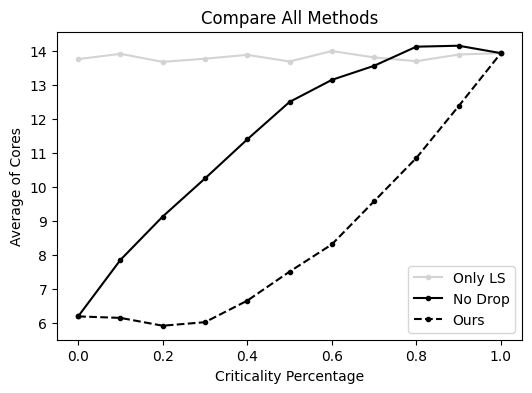

In [46]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='No Drop', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Criticality Percentage')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()